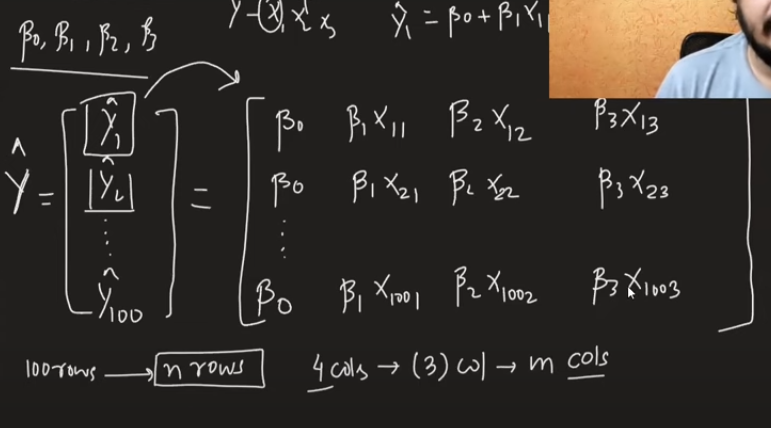

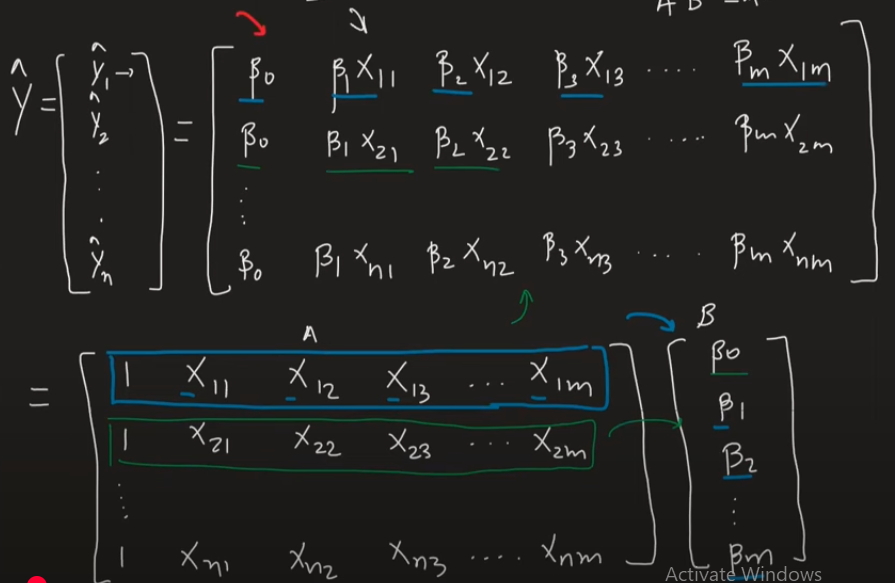

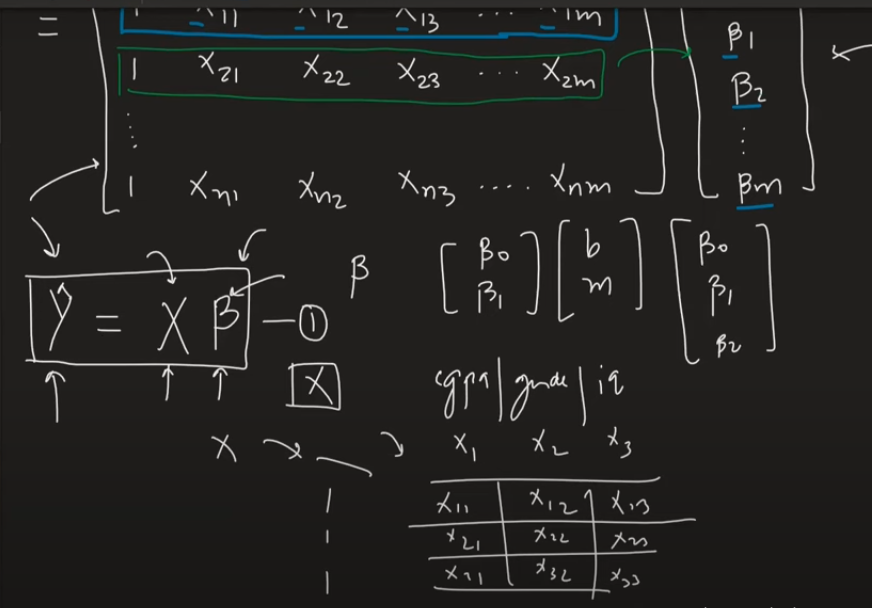

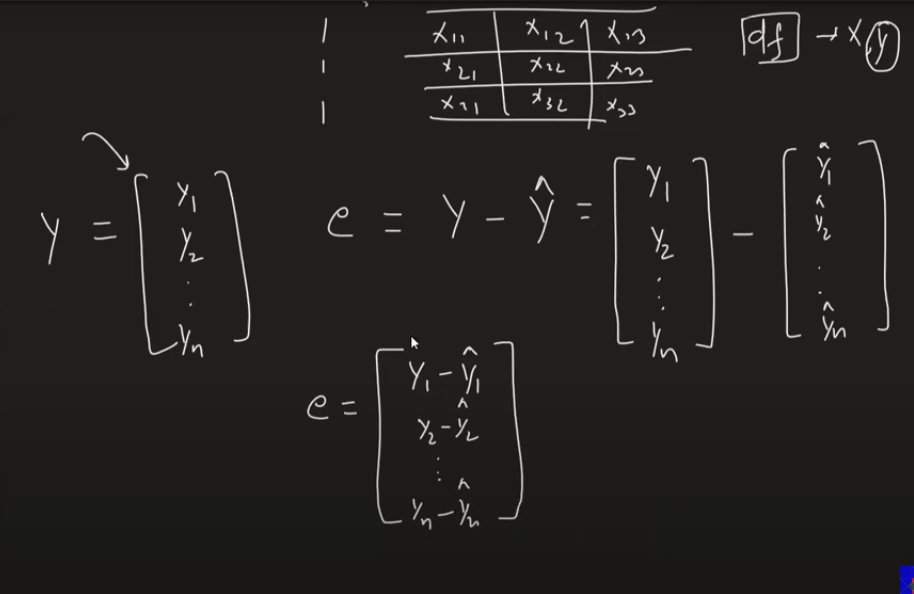

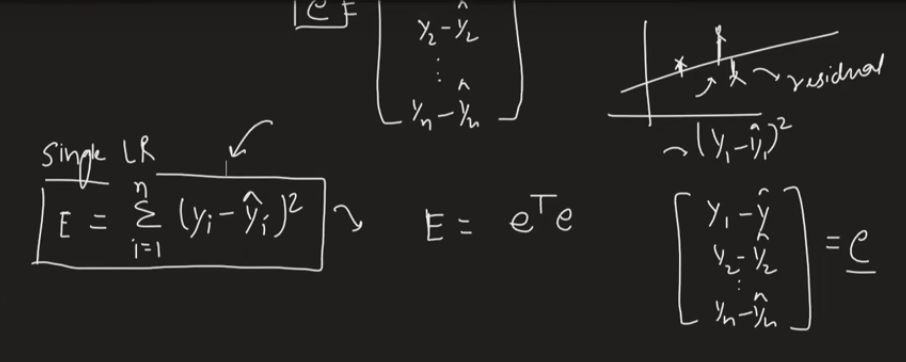

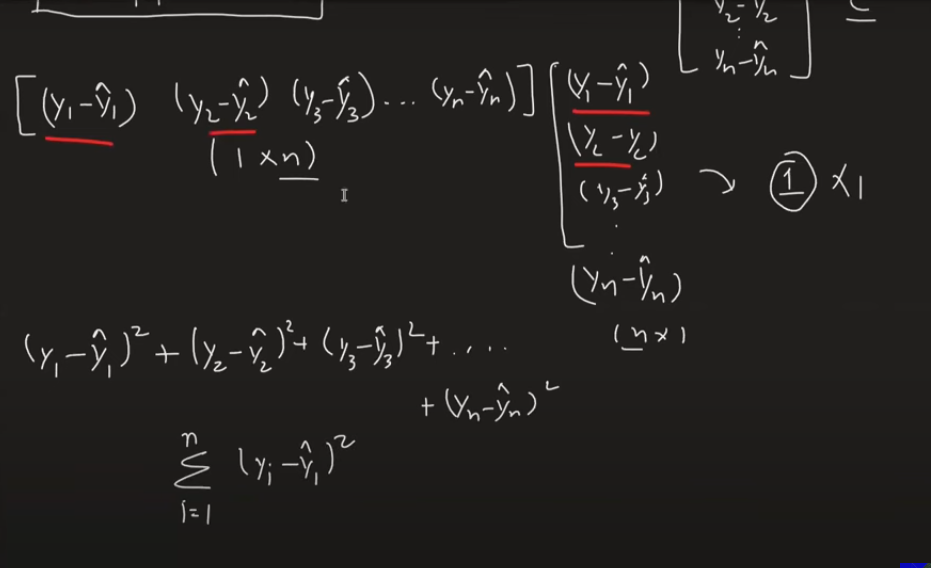

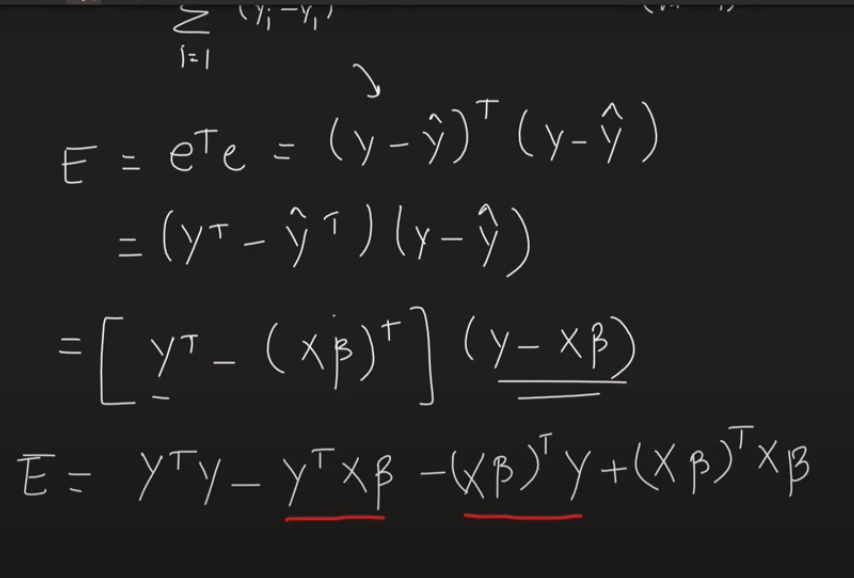

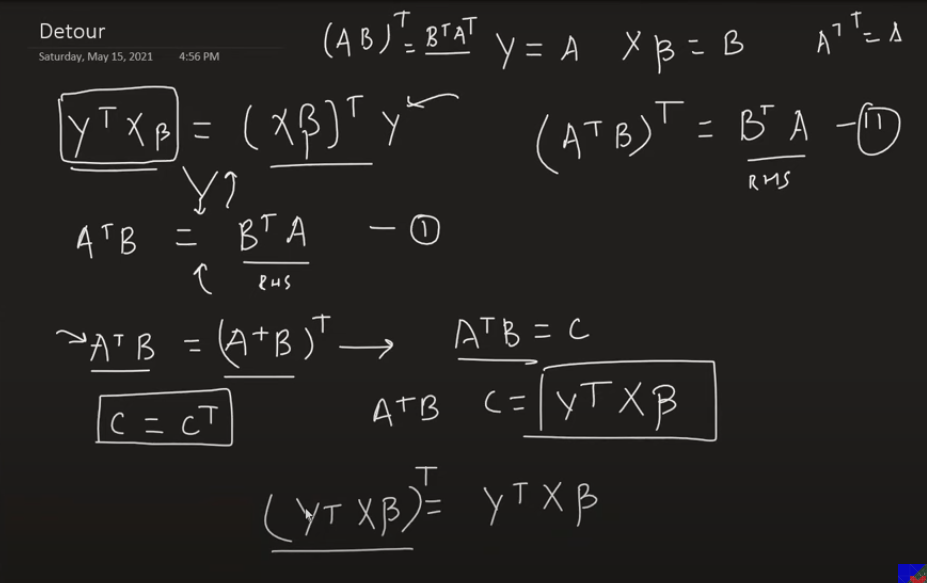

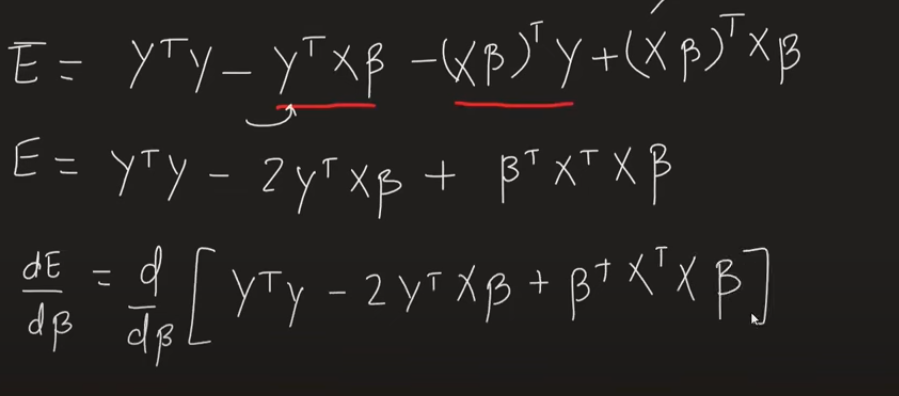

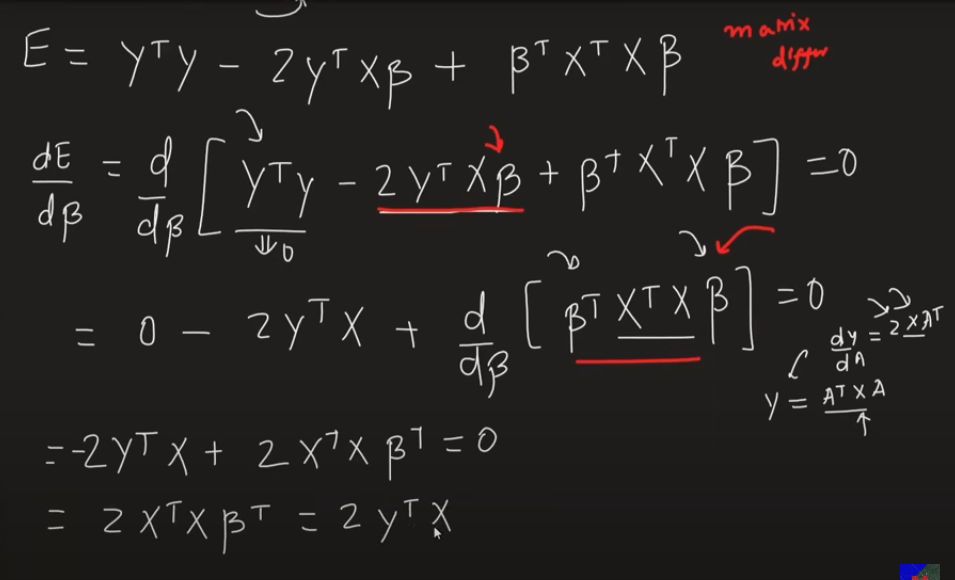

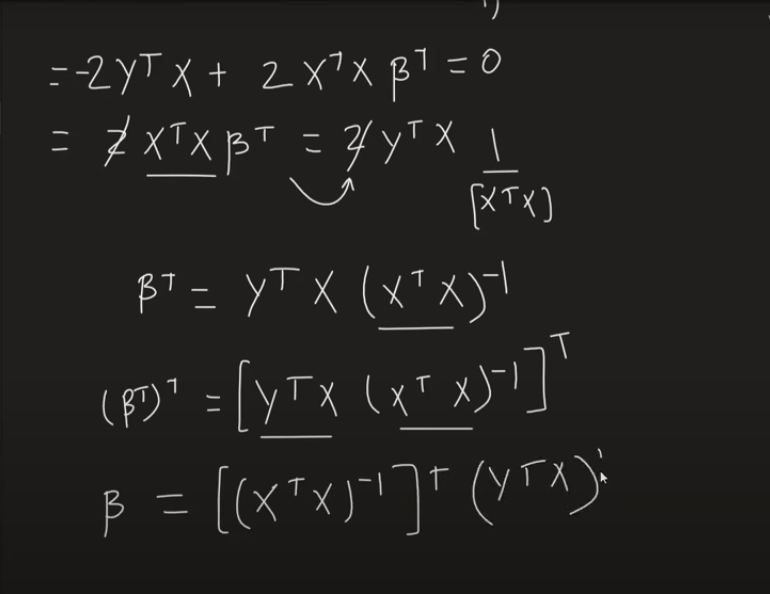

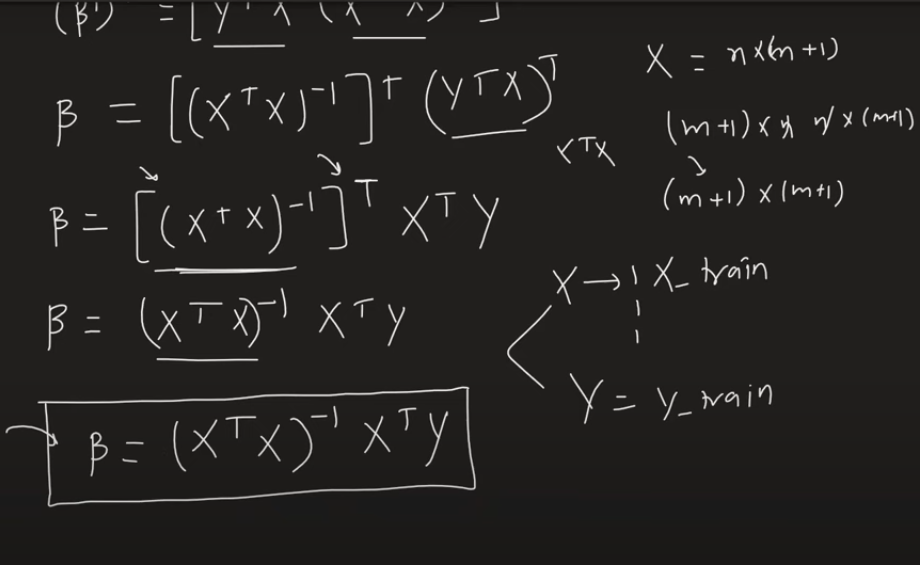

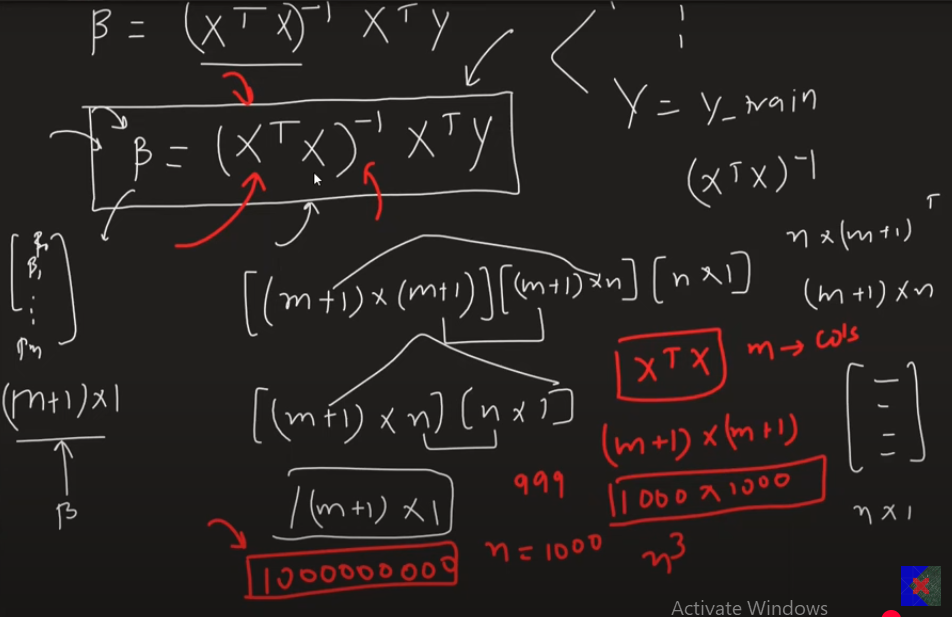

In [2]:
import numpy as np
from sklearn.datasets import load_diabetes

In [3]:
x, y = load_diabetes(return_X_y=True)

In [4]:
x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [6]:
x.shape

(442, 10)

In [7]:
y.shape

(442,)

# Using Sklearn's Linear Regression

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [11]:
print(x_train.shape)
print(x_test.shape)

(353, 10)
(89, 10)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = reg.predict(x_test)

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y_test, y_pred)

0.4399338661568968

In [ ]:
reg.coef_ #b1, b2, beta3 ...

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [ ]:
reg.intercept_ #b0

151.88331005254167

# Making our own LinearRegression

In [32]:
class MeraLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, x_train, y_train):
        x_train = np.insert(x_train, 0, 1, axis=1)

        betas = np.linalg.inv(np.dot(x_train.T, x_train)).dot(x_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
        # print(betas)
    
    def predict(self, x_test):
        # print(x_test.shape)

        y_pred = self.intercept_ + np.dot(x_test, self.coef_)
        return y_pred

    

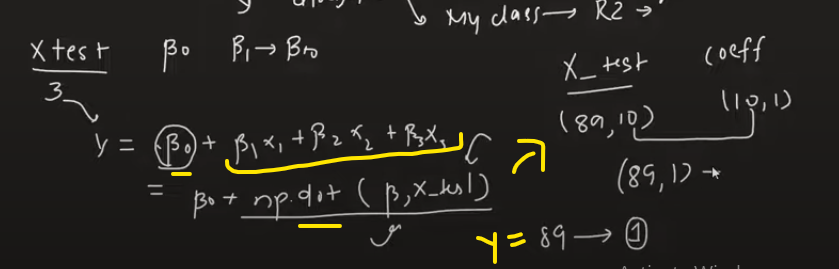
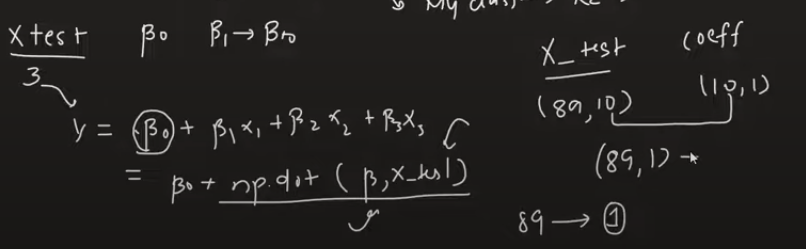

In [33]:
lr = MeraLR()

In [ ]:
lr.fit(x_train, y_train)

(353, 10)


In [26]:
x_train

array([[-0.00188202, -0.04464164, -0.06979687, ..., -0.03949338,
        -0.06291688,  0.04034337],
       [-0.00914709, -0.04464164,  0.01103904, ..., -0.03949338,
         0.01703607, -0.0052198 ],
       [ 0.02354575,  0.05068012, -0.02021751, ..., -0.03949338,
        -0.09643495, -0.01764613],
       ...,
       [ 0.06350368,  0.05068012, -0.00405033, ..., -0.00259226,
         0.08449153, -0.01764613],
       [-0.05273755,  0.05068012, -0.01806189, ...,  0.1081111 ,
         0.03606033, -0.04249877],
       [ 0.00175052,  0.05068012,  0.05954058, ...,  0.1081111 ,
         0.06898589,  0.12732762]])

In [27]:
x_train.shape

(353, 10)

In [24]:
np.insert(x_train, 0, 1, axis=1) #in what, index, value to insert, axis=1 means column

array([[ 1.        , -0.00188202, -0.04464164, ..., -0.03949338,
        -0.06291688,  0.04034337],
       [ 1.        , -0.00914709, -0.04464164, ..., -0.03949338,
         0.01703607, -0.0052198 ],
       [ 1.        ,  0.02354575,  0.05068012, ..., -0.03949338,
        -0.09643495, -0.01764613],
       ...,
       [ 1.        ,  0.06350368,  0.05068012, ..., -0.00259226,
         0.08449153, -0.01764613],
       [ 1.        , -0.05273755,  0.05068012, ...,  0.1081111 ,
         0.03606033, -0.04249877],
       [ 1.        ,  0.00175052,  0.05068012, ...,  0.1081111 ,
         0.06898589,  0.12732762]])

In [25]:
np.insert(x_train, 0, 1, axis=1).shape

(353, 11)

In [ ]:
lr.fit(x_train, y_train) # we need to extract the first beta0 from here 

[ 151.88331005   -9.15865318 -205.45432163  516.69374454  340.61999905
 -895.5520019   561.22067904  153.89310954  126.73139688  861.12700152
   52.42112238]


In [34]:
lr = MeraLR()

In [35]:
lr.fit(x_train, y_train)

In [36]:
y_pred = lr.predict(x_test)

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test, y_pred)

0.43993386615689756

In [39]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [40]:
lr.intercept_

151.8833100525417

In [41]:
#compare it with the sklearn lr that we used above :)